<a href="https://colab.research.google.com/github/CesarGarcia1995/reduccion_datos_ecfm/blob/main/examenparcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import iqr

# Cargar la data
Con pandas carga los datos de el archivo csv *Data_CHF_Zhao_2020_ATE.csv*

In [ ]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("Data_CHF_Zhao_2020_ATE.csv")

# Mostrar las primeras filas del dataframe
print(df.head())

   id   author geometry  pressure [MPa]  mass_flux [kg/m2-s]  x_e_out [-]  \
0   1  Inasaka     tube            0.39                 5600      -0.1041   
1   2  Inasaka     tube            0.31                 6700      -0.0596   
2   3  Inasaka     tube            0.33                 4300      -0.0395   
3   4  Inasaka     tube            0.62                 6400      -0.1460   
4   5  Inasaka     tube            0.64                 4700      -0.0849   

   D_e [mm]  D_h [mm]  length [mm]  chf_exp [MW/m2]  
0       3.0       3.0          100             11.3  
1       3.0       3.0          100             10.6  
2       3.0       3.0          100              7.3  
3       3.0       3.0          100             12.8  
4       3.0       3.0          100             11.0  


In [ ]:
data_chf.describe()

,id,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
count,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000
mean,933.000000,10.010949,2862.647721,0.016179,9.417212,16.167721,911.340483,3.854638
std,538.523444,4.282715,1656.412247,0.117575,6.333807,21.182870,726.718974,1.985535
min,1.000000,0.100000,0.000000,-0.866700,1.000000,1.000000,10.000000,0.800000
25%,467.000000,6.890000,1519.000000,-0.048300,5.600000,5.600000,432.000000,2.400000
50%,933.000000,10.340000,2590.000000,0.024400,8.500000,10.300000,625.000000,3.500000
75%,1399.000000,13.790000,3933.000000,0.100600,11.100000,15.200000,1778.000000,4.800000
max,1865.000000,20.680000,7975.000000,0.232000,37.500000,120.000000,3048.000000,19.300000


Creamos una lista con las variables numericas

In [ ]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("Data_CHF_Zhao_2020_ATE.csv")

# Seleccionar solo las columnas numéricas
numerical_vars = df.select_dtypes(include=['number']).columns.tolist()

# Mostrar la lista de variables numéricas
print(numerical_vars)

['id', 'pressure [MPa]', 'mass_flux [kg/m2-s]', 'x_e_out [-]', 'D_e [mm]', 'D_h [mm]', 'length [mm]', 'chf_exp [MW/m2]']


# Analizando los datos númericos

Para realizar un análisis de incertidumbre en los datos, es fundamental calcular y entender diversas medidas de dispersión y error. A continuación, se describen las medidas de dispersión y error utilizadas para evaluar la variabilidad y la precisión de los datos.


## Medidas de Disperción
### Media:
Representa el valor promedio de los datos y se calcula sumando todos los valores y dividiéndolos por el número total de observaciones. La media es útil para obtener una visión general de la magnitud típica de los valores en un conjunto de datos.

### Desviación Estándar
Mide la variabilidad o dispersión de los datos alrededor de la media. Es crucial para evaluar la variabilidad de los datos.

### SEM (Error Estándar de la Media)
El Error Estándar de la Media (SEM) es una medida que describe cuán precisamente la media de una muestra representa la media de la población general.
El SEM se calcula dividiendo la desviación estándar de la muestra por la raíz cuadrada del número de observaciones en la muestra.
$$
SEM = \frac{\sigma}{\sqrt{n}}
$$

### SEM % of Mean (Error Estándar de la Media como Porcentaje de la Media)
El SEM % of Mean también expresa el SEM como un porcentaje de la media.Este valor proporciona una medida de cuán significativa es la incertidumbre alrededor de la media en términos relativos al tamaño de la media misma. Es útil para comparar la precisión de las medias entre diferentes conjuntos de datos donde las escalas de medición pueden diferir.

$$
\text{SEM \% of Mean} = \frac{SEM}{\mu} \times 100
$$


###  Rango Intercuartílico (IQR)
El IQR es una medida de dispersión estadística que se utiliza para describir la variabilidad de los datos al concentrarse en la parte central de una distribución. El IQR es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) de los datos. Estos cuartiles dividen el conjunto de datos en cuatro partes iguales.
$$
\text{IQR} = Q3 - Q1
$$


Calcular para la lista de variables numericas:
- Media
- desviación estándar
- SEM (Error Estándar de la Media)
- Error Estándar de la Media como Porcentaje de la Media
- IQR


Debemos almacenar los resultados en un data frame de pandas, el data fame lo debemos crear a partir de un diccionario.

El resultado debe ser el siguiente

| Variable     | Mean       | Standard Deviation | SEM       | SEM % of Mean | IQR    |
|--------------|------------|---------------------|-----------|---------------|--------|
| pressure [MPa]| 10.010949  | 4.282715            | 0.099170  | 0.990614      | 6.9000 |
| mass_flux [kg/m²-s] | 2862.647721 | 1656.412247  | 38.355621 | 1.339865      | 2414.0000 |
| x_e_out [-]  | 0.016179   | 0.117575            | 0.002723  | 16.827823     | 0.1489 |
| D_e [mm]     | 9.417212   | 6.333807            | 0.146665  | 1.557410      | 5.5000 |
| D_h [mm]     | 16.167721  | 21.182870           | 0.490507  | 3.033867      | 9.6000 |
| length [mm]  | 911.340483 | 726.718974          | 16.827790 | 1.846488      | 1346.0000 |
| chf_exp [MW/m²] | 3.854638  | 1.985535           | 0.045977  | 1.192764      | 2.4000 |



In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import iqr

# Cargar el archivo CSV
df = pd.read_csv("Data_CHF_Zhao_2020_ATE.csv")

# Seleccionar solo las columnas numéricas
numerical_vars = df.select_dtypes(include=['number'])

# Desviación estándar de las columnas numéricas
std_devs = numerical_vars.std()

# Medias de las columnas numéricas
means = numerical_vars.mean()

# Cantidad de muestras para cada variable
n_samples = numerical_vars.count()

# Error estándar medio (SEM)
sems = std_devs / np.sqrt(n_samples)

# Porcentaje del error estándar respecto a la media
sem_percentage = (sems / means) * 100

# IQR utilizando la función iqr de scipy.stats
iqr_data = numerical_vars.apply(iqr)

# Crear un DataFrame para mostrar los resultados
uncertainty_df = pd.DataFrame({
    "Variable": numerical_vars.columns,
    "Mean": means.values,
    "Standard Deviation": std_devs.values,
    "SEM": sems.values,
    "SEM % of Mean": sem_percentage.values,
    "IQR": iqr_data.values
})

# Mostrar el DataFrame con los resultados
print(uncertainty_df)

              Variable         Mean  Standard Deviation        SEM  \
0                   id   933.000000          538.523444  12.469964   
1       pressure [MPa]    10.010949            4.282715   0.099170   
2  mass_flux [kg/m2-s]  2862.647721         1656.412247  38.355621   
3          x_e_out [-]     0.016179            0.117575   0.002723   
4             D_e [mm]     9.417212            6.333807   0.146665   
5             D_h [mm]    16.167721           21.182870   0.490507   
6          length [mm]   911.340483          726.718974  16.827790   
7      chf_exp [MW/m2]     3.854638            1.985535   0.045977   

   SEM % of Mean        IQR  
0       1.336545   932.0000  
1       0.990614     6.9000  
2       1.339865  2414.0000  
3      16.827823     0.1489  
4       1.557410     5.5000  
5       3.033867     9.6000  
6       1.846488  1346.0000  
7       1.192764     2.4000  


## Interpretando las medidas de dispersión
Escribe en un celda en markdown la interpretación de los resultados en la tabla de medidas de dispersión

In [ ]:
## Interpretación de los Resultados

# El análisis de incertidumbre realizado sobre las variables numéricas del conjunto de datos proporciona información clave sobre la variabilidad y la precisión de las mediciones. A continuación, se interpreta cada métrica calculada:

# 1. **Media (Mean)**
#    Representa el valor promedio de cada variable. Es una medida de tendencia central que indica el valor típico de los datos.

# 2. **Desviación Estándar (Standard Deviation)**
#    Mide la dispersión de los datos alrededor de la media. Un valor alto indica que los datos están más dispersos, mientras que un valor bajo sugiere menor variabilidad.

# 3. **Error Estándar de la Media (SEM)**
#    Indica qué tan precisa es la media muestral al estimar la media poblacional. Valores pequeños sugieren que la media calculada es una buena representación de la población.

# 4. **Error Estándar de la Media como Porcentaje de la Media (SEM % of Mean)**
#    Expresa el SEM en términos relativos, lo que permite comparar la precisión entre diferentes variables. Valores más altos indican mayor incertidumbre en la estimación de la media.

# 5. **Rango Intercuartílico (IQR)**
#    Representa la dispersión de los datos en el rango intermedio (entre el primer y tercer cuartil). Es útil para detectar la presencia de valores atípicos y evaluar la concentración de los datos en la parte central de la distribución.

### Conclusión
# El análisis de estas métricas permite identificar qué variables presentan mayor variabilidad y cuáles tienen estimaciones más precisas. Variables con alta desviación estándar e IQR pueden indicar una distribución amplia de los datos, mientras que valores bajos de SEM y SEM % of Mean sugieren que la media es un estimador confiable de la población.

## Graficando la data

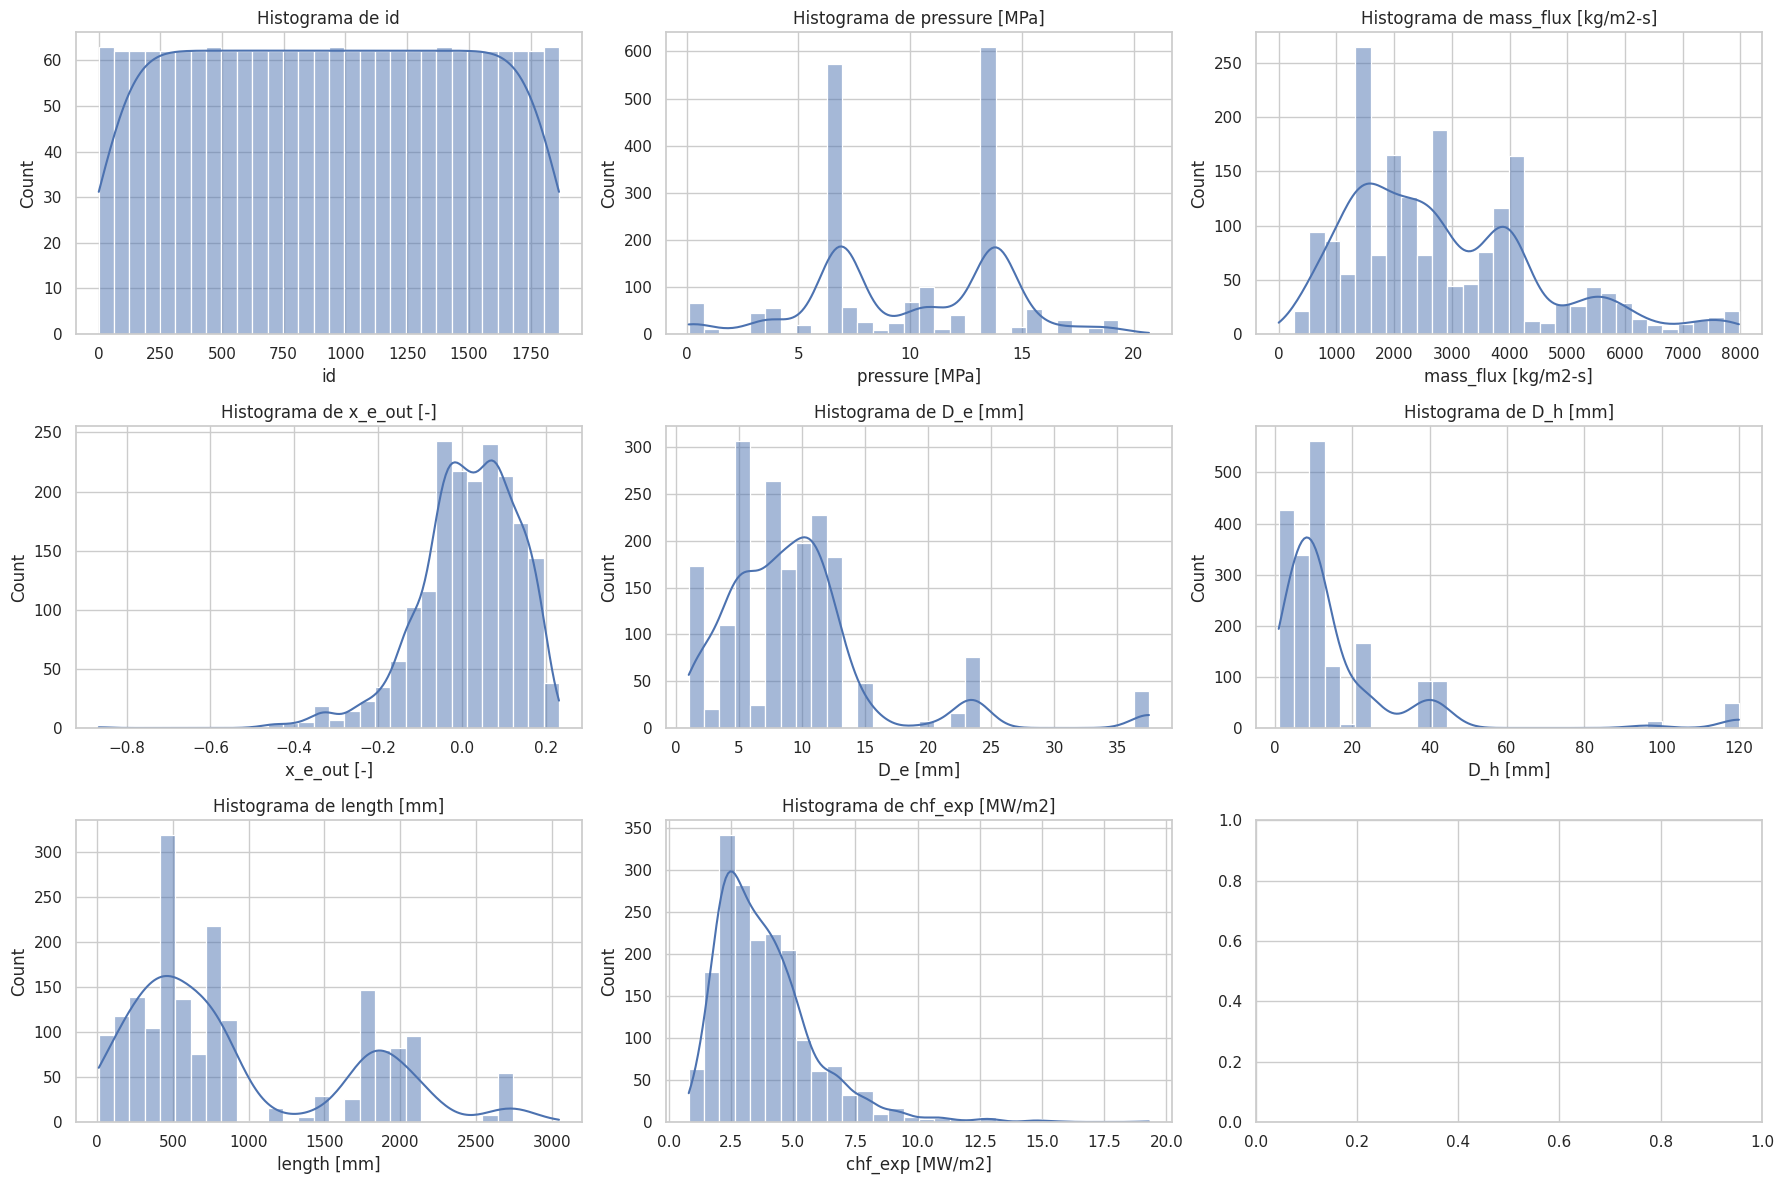

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear una figura con subgráficos 3x3
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# Lista de columnas numéricas
numerical_cols = numerical_vars.columns

# Graficar histogramas para cada variable numérica
for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Asegurarse de no exceder el número de subgráficos
        sns.histplot(numerical_vars[col], bins=30, kde=True, ax=axes[i])
        axes[i].set_title(f"Histograma de {col}")

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()

              Variable         Mean  Standard Deviation        SEM  \
0                   id   933.000000          538.523444  12.469964   
1       pressure [MPa]    10.010949            4.282715   0.099170   
2  mass_flux [kg/m2-s]  2862.647721         1656.412247  38.355621   
3          x_e_out [-]     0.016179            0.117575   0.002723   
4             D_e [mm]     9.417212            6.333807   0.146665   
5             D_h [mm]    16.167721           21.182870   0.490507   
6          length [mm]   911.340483          726.718974  16.827790   
7      chf_exp [MW/m2]     3.854638            1.985535   0.045977   

   SEM % of Mean        IQR  
0       1.336545   932.0000  
1       0.990614     6.9000  
2       1.339865  2414.0000  
3      16.827823     0.1489  
4       1.557410     5.5000  
5       3.033867     9.6000  
6       1.846488  1346.0000  
7       1.192764     2.4000  


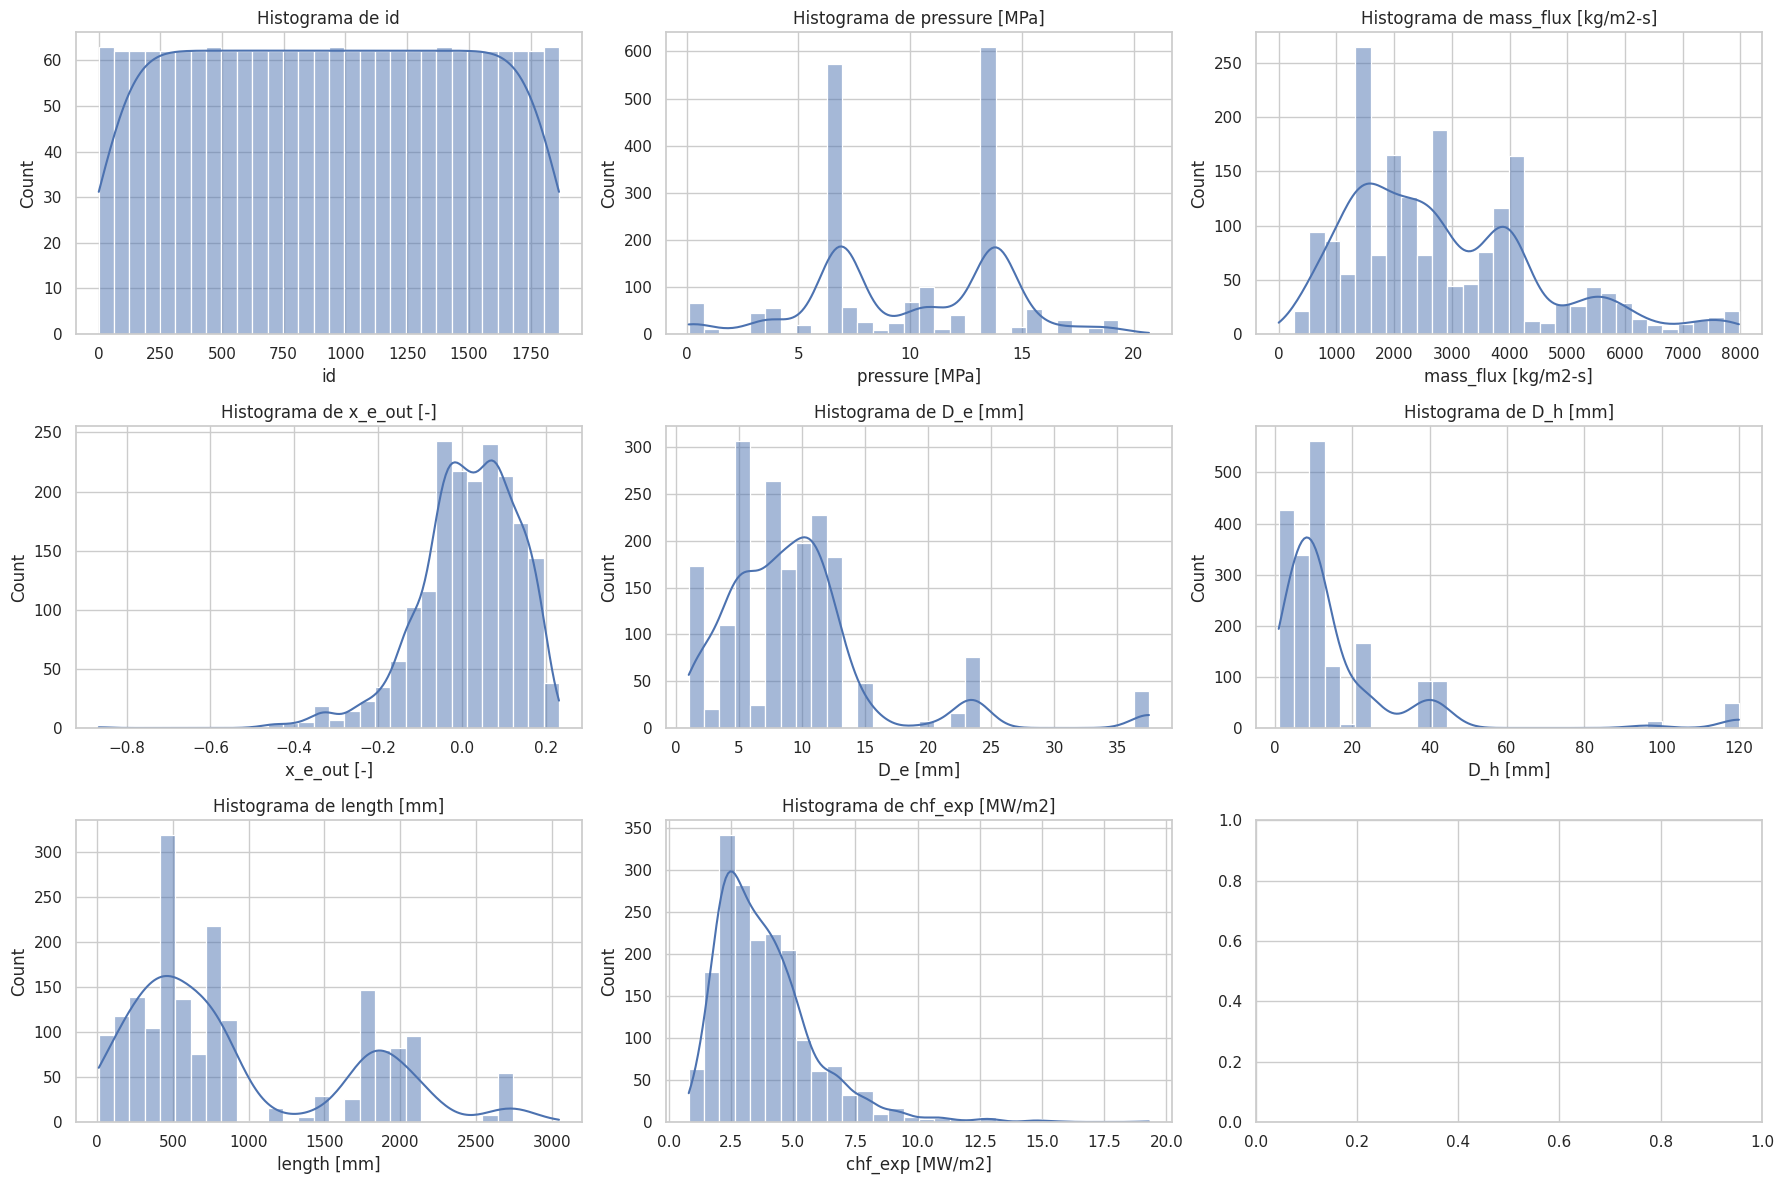

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import iqr

# Cargar el archivo CSV
df = pd.read_csv("Data_CHF_Zhao_2020_ATE.csv")

# Seleccionar solo las columnas numéricas
numerical_vars = df.select_dtypes(include=['number'])

# Desviación estándar de las columnas numéricas
std_devs = numerical_vars.std()

# Medias de las columnas numéricas
means = numerical_vars.mean()

# Cantidad de muestras para cada variable
n_samples = numerical_vars.count()

# Error estándar medio (SEM)
sems = std_devs / np.sqrt(n_samples)

# Porcentaje del error estándar respecto a la media
sem_percentage = (sems / means) * 100

# IQR utilizando la función iqr de scipy.stats
iqr_data = numerical_vars.apply(iqr)

# Crear un DataFrame para mostrar los resultados
uncertainty_df = pd.DataFrame({
    "Variable": numerical_vars.columns,
    "Mean": means.values,
    "Standard Deviation": std_devs.values,
    "SEM": sems.values,
    "SEM % of Mean": sem_percentage.values,
    "IQR": iqr_data.values
})

# Mostrar el DataFrame con los resultados
print(uncertainty_df)

## Interpretación de los Resultados


import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear una figura con subgráficos 3x3
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# Lista de columnas numéricas
numerical_cols = numerical_vars.columns

# Graficar histogramas para cada variable numérica
for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Asegurarse de no exceder el número de subgráficos
        sns.histplot(numerical_vars[col], bins=30, kde=True, ax=axes[i])
        axes[i].set_title(f"Histograma de {col}")

# Ajustar el diseño
plt.tight_layout()

